In [1]:
import pandas as pd
filename = '분류된_상품_데이터.xlsx'

df = pd.read_excel(filename, engine='openpyxl')

In [2]:
df

,업체명,상품명,상품 분류,주문일자,판매금액,주문수량
0,7321디자인,[7321디자인] Plan B 스터디 플래너 ver.2 (옵션선택),일반 상품,2022-10-31 12:22:35,22800,6
1,7321디자인,[7321디자인] 스탠바이미 카드 (옵션선택),일반 상품,2022-11-01 18:43:34,3800,2
2,7321디자인,[7321디자인] 에브리 홀리데이 스티커 6종세트-파티타임,일반 상품,2022-10-31 21:23:19,4500,1
3,7321디자인,[7321디자인] 에브리 홀리데이 스티커 6종세트-파티타임,일반 상품,2022-10-31 21:24:24,4500,1
4,7321디자인,[7321디자인] 에브리 홀리데이 스티커 6종세트-파티타임,일반 상품,2022-10-31 21:33:14,4500,1
...,...,...,...,...,...,...
209252,헬스하우스,[주간특가] 헬스하우스 석류 콜라겐 C스틱 3g 100개입+기본 배송비 포함,일반 상품,2022-05-12 16:12:47,12900,1
209253,헬스하우스,[주간특가] 헬스하우스 석류 콜라겐 C스틱 3g 100개입+기본 배송비 포함,일반 상품,2022-05-13 11:29:17,25800,2
209254,헬스하우스,[주간특가] 헬스하우스 석류 콜라겐 C스틱 3g 100개입+기본 배송비 포함,일반 상품,2022-05-14 02:38:23,25800,2
209255,헬스하우스,[주간특가] 헬스하우스 석류 콜라겐 C스틱 3g 100개입+기본 배송비 포함,일반 상품,2022-05-14 02:39:40,25800,2


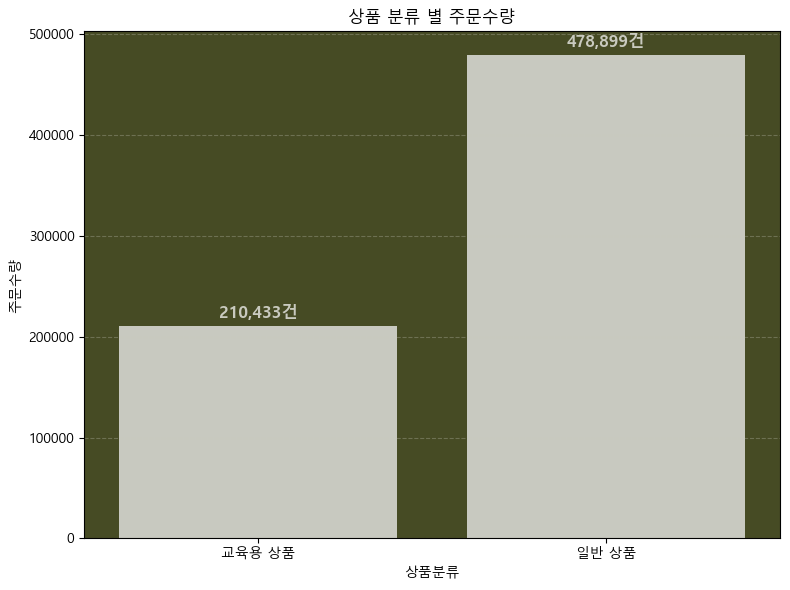

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 상품 분류에 따른 주문수량 집계
summary = df.groupby('상품 분류')['주문수량'].sum().reset_index()

# 그래프 그리기
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='상품 분류', y='주문수량', data=summary, color='#c9cabfff')
ax = plt.gca()
ax.set_facecolor('#464b24')



# 막대 상단에 주문수량 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}건', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=12,
                color='#c9cabfff',
                fontweight='bold')
    
plt.grid(axis='y', color='#c9cabfff', linestyle='--', alpha=0.3)

plt.title('상품 분류 별 주문수량')
plt.xlabel('상품분류')
plt.ylabel('주문수량')
plt.tight_layout()
plt.show()


In [5]:
plt.rc('font', family='Malgun Gothic')  # 윈도우를 사용하고 있을 떄

# 한글 기호가 보이게되면, - (마이너스) 기호가 깨진다.

# 마이너스 기호 문제 해결하기
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

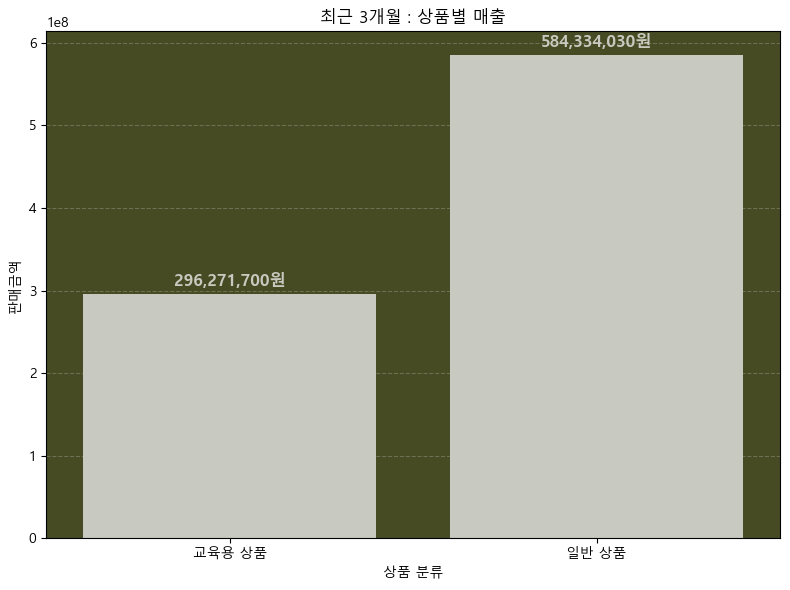

In [37]:

# 최근 3개월 간의 데이터만 필터링
recent_3months = df[df['주문일자'].between('2022-09-08', '2022-11-09')]

# '상품 분류'별 매출 집계
grouped = recent_3months.groupby('상품 분류')['판매금액'].sum().sort_values(ascending=True).reset_index()

# 그래프 그리기

plt.figure(figsize=(8, 6))
plt.grid(axis='y', color='#c9cabfff', linestyle='--', alpha=0.3)
sns.barplot(data=grouped, x='상품 분류', y='판매금액', color='#c9cabfff')

ax = plt.gca()
ax.set_facecolor('#464b24')

plt.title('최근 3개월 : 상품별 매출')
plt.ylabel('판매금액')
plt.xlabel('상품 분류')

plt.tight_layout()

# 막대 상단에 주문수량 표시
for n in ax.patches:
    ax.annotate(f'{int(n.get_height()):,}원', 
                (n.get_x() + n.get_width() / 2., n.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=12,
                color='#c9cabfff',
                fontweight='bold')
    
plt.show()


In [83]:
result = df.groupby('상품 분류')[['판매금액', '주문수량']].sum()

print(result)

              판매금액    주문수량
상품 분류                     
교육용 상품  5829833420  210433
일반 상품   5698339815  478899


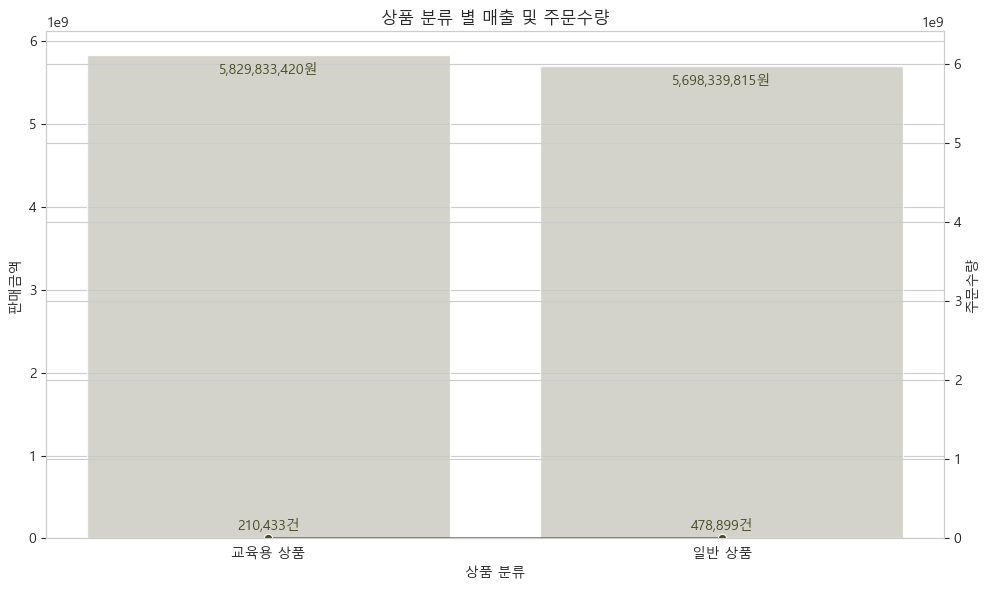

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# '상품 분류'별로 매출 및 주문수량 집계
summary = df.groupby('상품 분류')[['판매금액', '주문수량']].sum().reset_index()

plt.figure(figsize=(10, 6))

# 매출 막대그래프
bars = sns.barplot(x='상품 분류', y='판매금액', data=summary, color='#c9cabfff', alpha=0.8)

# 주문수량 선그래프 (두 번째 y축 사용)
ax = plt.gca().twinx()
sns.lineplot(x='상품 분류', y='주문수량', data=summary, ax=ax, color='#464b24', marker='o')

plt.gca().set_ylim(0, summary['판매금액'].max() * 1.1)

# 막대 상단에 판매금액 표시
for index, value in enumerate(summary['판매금액']):
    plt.text(index, value, f'{int(value):,}원', ha='center', va='bottom', color='#464b24', fontsize=10)

# 선그래프 포인트 상단에 주문수량 표시
for i, value in enumerate(summary['주문수량']):
    ax.annotate(f'{value:,}건', 
                (i, value),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10,
                color='#464b24')

plt.title('상품 분류 별 매출 및 주문수량')
plt.xlabel('상품 분류')
plt.ylabel('판매금액')
ax.set_ylabel('주문수량')

plt.tight_layout()
plt.show()


In [18]:
plt.rc('font', family='Malgun Gothic')  # 윈도우를 사용하고 있을 떄

# 한글 기호가 보이게되면, - (마이너스) 기호가 깨진다.

# 마이너스 기호 문제 해결하기
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False